<a href="https://colab.research.google.com/github/TutuBraz/bellabeat-custumer-behavior/blob/main/bellabeat_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparar.

In [480]:
#manipulacao
import pandas as pd

#datas
from datetime import datetime

#vizualizacao
import matplotlib.pyplot as plt
import seaborn as sns


In [481]:
#Funcao para verificaar a integridade dos dados
def Integridade(dataset, col='Id', col2='Time'):
  print(f'Quantidade de usuários: {len(dataset[col].unique())}')
  print(f'Valors duplicados: {dataset.duplicated().sum()}')
  print(f'Valores ausentes:{dataset.isnull().sum()}')

In [482]:
#resumo das atividades dos usúarios
day_activity = pd.read_csv('/content/dailyActivity_merged.csv')
Integridade(day_activity)

Quantidade de usuários: 33
Valors duplicados: 0
Valores ausentes:Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [483]:
day_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [484]:
#minutos dormidos por dia
sleep_day =pd.read_csv('/content/sleepDay_merged.csv')
Integridade(sleep_day)

Quantidade de usuários: 24
Valors duplicados: 3
Valores ausentes:Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


In [485]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [486]:
hour_intensities = pd.read_csv('/content/hourlyIntensities_merged.csv')
Integridade(hour_intensities)

Quantidade de usuários: 33
Valors duplicados: 0
Valores ausentes:Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64


In [487]:
hour_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


#Processar.

In [488]:
#Removendo duplicatas do dataset sleep_day
sleep_day = sleep_day.drop_duplicates()

#Verificando a integridade
Integridade(sleep_day)

Quantidade de usuários: 24
Valors duplicados: 0
Valores ausentes:Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64


In [489]:
def DiasSemana(dataset, col):
  #transformando a coluna para tipo date
  dataset.ActivityDate = pd.to_datetime(dataset[col], format="%m/%d/%Y")
  
  #Criando coluna dias da semana
  dia_semana = pd.to_datetime(dataset[col]).dt.strftime('%A')

  #Inserir dia da semana como uma nova coluna no dataframe
  dataset.insert(2, 'dia_semana', dia_semana)

  return dataset.head()

In [490]:
#Funcao para transformar o formato de 12 horas e 24 horas
def convert24(str1): 
    if str1[-2:] == "AM" and str1[:2] == "12": 
        return "00" + str1[2:-2] 
          
    elif str1[-2:] == "AM": 
        if str1[:2] == '10' or str1[:2] == '11':
          return str1[:-2] 
        else: 
          return '0'+str1[:-2] 
    
    elif str1[-2:] == "PM" and str1[:2] == "12": 
        return str1[:-2] 
          
    else: 
        if ':' not in str1[:2]:
          return str(int(str1[:2]) + 12) + str1[2:8]
        
        else:
          hora =  str(int(str1[:1]) + 12) + str1[2:8] 
          return hora[:2]+':'+hora[2:]

def separa(df, col):
  df['data'], df['hora'] = df[col].str.split(' ', 1).str

In [491]:
#Criando colunas data e hora
separa(hour_intensities, 'ActivityHour')
separa(sleep_day, 'SleepDay')

#Aplicando a função em todas as linhas
hour_intensities['hora'] = hour_intensities['hora'].apply(convert24)
sleep_day['hora'] = sleep_day['hora'].apply(convert24)

#renomeando coluna
day_activity.rename(columns={'ActivityDate': 'data'}, inplace=True)

#criando coluna dias da semana
DiasSemana(hour_intensities, 'data')
DiasSemana(sleep_day, 'data')
DiasSemana(day_activity, 'data')

#removendo coluna
hour_intensities.drop(['ActivityHour'], axis=1, inplace = True)
sleep_day.drop(['SleepDay'], axis=1, inplace = True)

#reorganizando as colunas
hour_intensities = hour_intensities[['data','dia_semana' ,'hora','TotalIntensity',	'AverageIntensity']]
sleep_day = sleep_day[['Id','data','dia_semana','TotalSleepRecords', 'TotalMinutesAsleep',	'TotalTimeInBed']]

<ipython-input-490-11371d2045dd>:24: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['data'], df['hora'] = df[col].str.split(' ', 1).str
<ipython-input-489-733d16e72ccc>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset.ActivityDate = pd.to_datetime(dataset[col], format="%m/%d/%Y")


In [492]:
#merge
merge_sleep_activity= pd.merge(sleep_day,day_activity, on = ['Id', 'data'],  
                  )
merge_sleep_activity.head()

,Id,data,dia_semana_x,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,dia_semana_y,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tuesday,1,327,346,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,Wednesday,2,384,407,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/15/2016,Friday,1,412,442,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
3,1503960366,4/16/2016,Saturday,2,340,367,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
4,1503960366,4/17/2016,Sunday,1,700,712,Sunday,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728


#Analisar.

### Como os usuários dormem?

In [493]:
#nova coluna com a quantidade de tempo que os usuarios ficam acordados na cama
sleep_day['JustBed'] = sleep_day['TotalTimeInBed']-sleep_day['TotalMinutesAsleep']

In [494]:
sleep_day.head()

,Id,data,dia_semana,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,JustBed
0,1503960366,4/12/2016,Tuesday,1,327,346,19
1,1503960366,4/13/2016,Wednesday,2,384,407,23
2,1503960366,4/15/2016,Friday,1,412,442,30
3,1503960366,4/16/2016,Saturday,2,340,367,27
4,1503960366,4/17/2016,Sunday,1,700,712,12


In [495]:
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,JustBed
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927,39.309756
std,2.060863e+09,0.346636,118.635918,127.455140,46.710932
min,1.503960e+09,1.000000,58.000000,61.000000,0.000000
25%,3.977334e+09,1.000000,361.000000,403.750000,17.000000
50%,4.702922e+09,1.000000,432.500000,463.000000,25.500000
75%,6.962181e+09,1.000000,490.000000,526.000000,40.000000
max,8.792010e+09,3.000000,796.000000,961.000000,371.000000


In [496]:
#mediana  
sleep_day.median()

<ipython-input-496-2957d444c1c0>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sleep_day.median()


Id                    4.702922e+09
TotalSleepRecords     1.000000e+00
TotalMinutesAsleep    4.325000e+02
TotalTimeInBed        4.630000e+02
JustBed               2.550000e+01
dtype: float64

Os usuários analisados apresentaram uma média de 419,17 minutos dormidos e uma mediana de 432,5 minutos dormidos, o que signica que em média e mediana os usuários estão preenchendo o minimo necessário de horas de sono por dia.

In [497]:
#Agrupamento por dia da média total de dias dormidos.
grp_sleep_day = sleep_day.groupby(['data']).mean()
grp_sleep_day.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,JustBed
data,,,,,
4/12/2016,4.996478e+09,1.230769,441.923077,479.692308,37.769231
4/13/2016,5.004067e+09,1.571429,430.428571,471.857143,41.428571
4/14/2016,5.457285e+09,1.076923,445.230769,480.230769,35.000000
4/15/2016,4.741724e+09,1.117647,427.470588,476.352941,48.882353
4/16/2016,4.927225e+09,1.357143,391.714286,433.000000,41.285714


[]

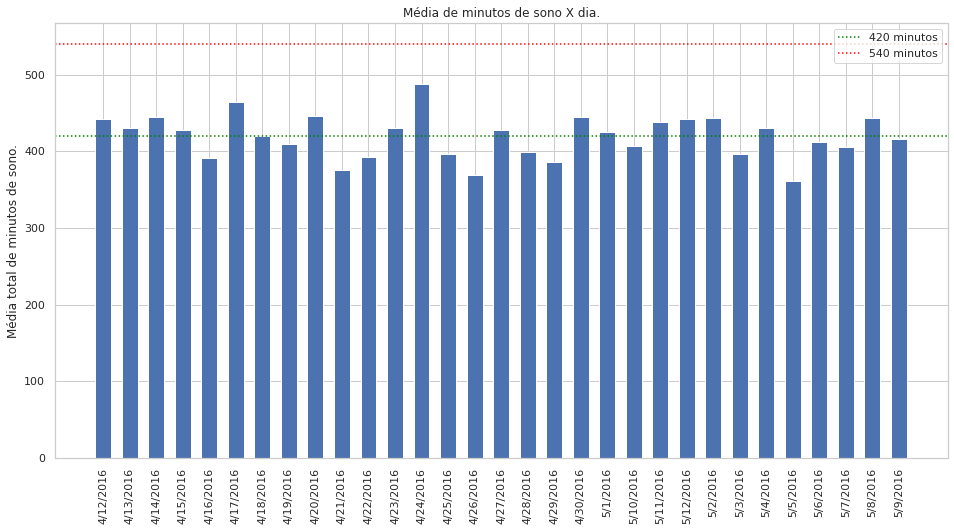

In [498]:
#Gráfico de média total por dia.
plt.figure(figsize=(16,8))
plt.bar(grp_sleep_day.index,grp_sleep_day['TotalMinutesAsleep'], width=0.6)

plt.xticks(rotation=90)

plt.axhline(420, linestyle='dotted', color='green', label='420 minutos')
plt.axhline(540, linestyle='dotted', color='red', label='540 minutos')
plt.title('Média de minutos de sono X dia.')

plt.ylabel('Média total de minutos de sono.')

plt.legend()
plt.plot()

Em média, pelo menos metade do mês os usúarios não dormem o mínimo necessário.

In [499]:
#Agrupento por dia de mediana total de dias dormidos.
grp_sleep_day = sleep_day.groupby(['data']).median()
grp_sleep_day.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,JustBed
data,,,,,
4/12/2016,4.702922e+09,1.0,429.0,464.0,23.0
4/13/2016,5.128440e+09,1.5,439.5,461.5,31.5
4/14/2016,5.553957e+09,1.0,445.0,489.0,27.0
4/15/2016,4.445115e+09,1.0,412.0,442.0,26.0
4/16/2016,4.574018e+09,1.0,394.0,446.5,25.5


[]

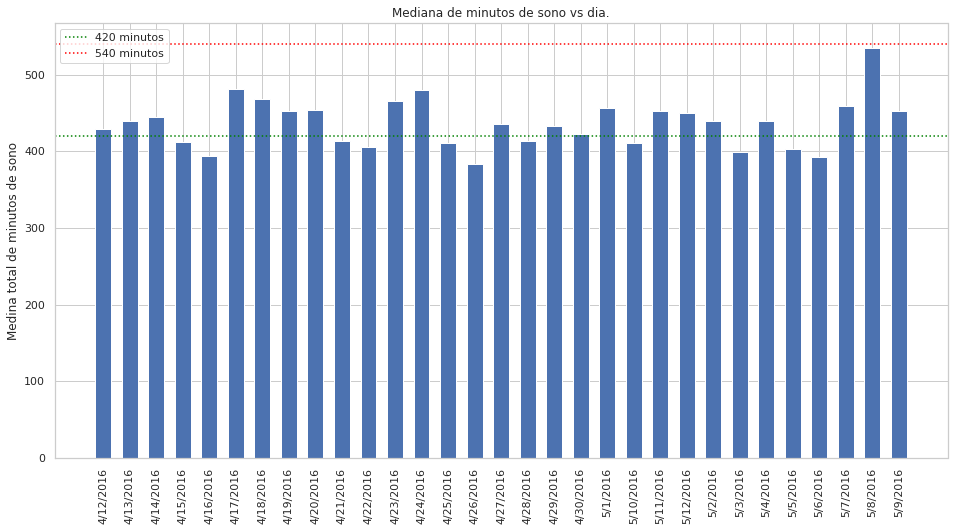

In [500]:
#Gráfico da mediana total por dia.
plt.figure(figsize=(16,8))
plt.bar(grp_sleep_day.index,grp_sleep_day['TotalMinutesAsleep'], width=0.6)

plt.xticks(rotation=90)

plt.axhline(420, linestyle='dotted', color='green', label='420 minutos')
plt.axhline(540, linestyle='dotted', color='red', label='540 minutos')
plt.title('Mediana de minutos de sono vs dia.')

plt.ylabel('Medina total de minutos de sono')

plt.legend()
plt.plot()

Em mediana, pelo menos metade do mês os usúarios não dormem o mínimo necessário.

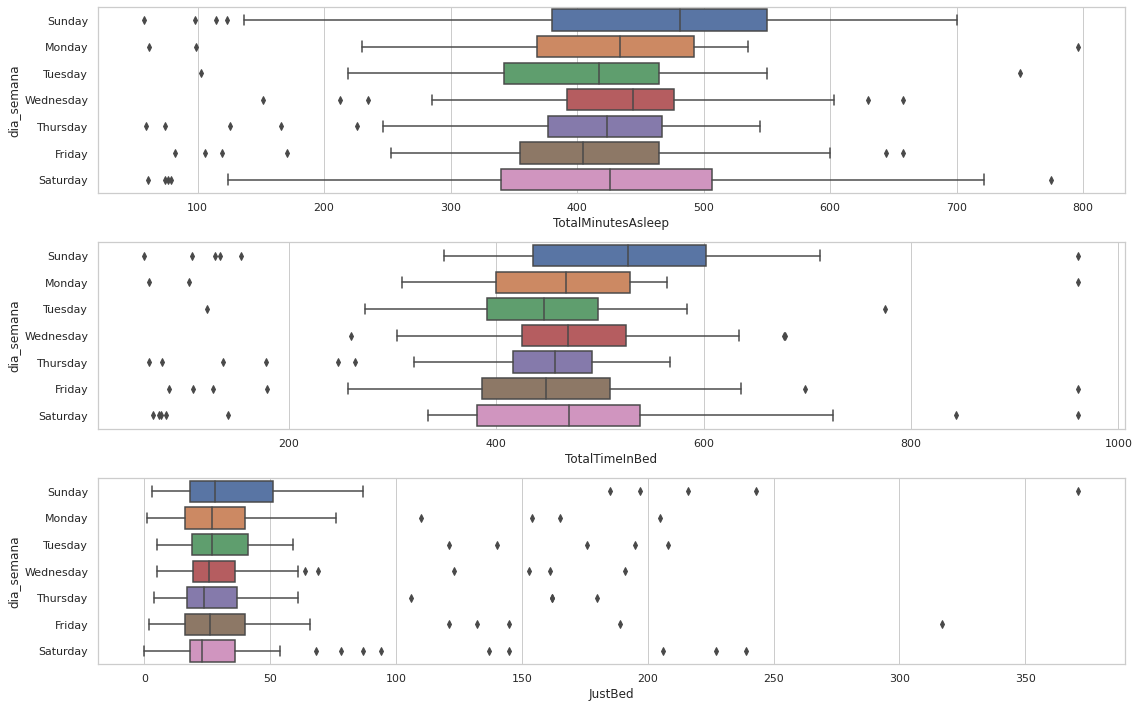

In [501]:
#Boxplot dos minutos totais de sono por dia da semana.
sns.set(style='whitegrid')

fig,axes = plt.subplots(3,1, figsize=(16,10))

sns.boxplot(x='TotalMinutesAsleep', y='dia_semana', data = sleep_day,
            ax = axes[0], order = ['Sunday','Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'])

sns.boxplot(x='TotalTimeInBed', y='dia_semana', data = sleep_day,
            ax = axes[1],order = ['Sunday','Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'])

sns.boxplot(x='JustBed', y='dia_semana', data = sleep_day,
            ax = axes[2],order = ['Sunday','Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'])


fig.tight_layout()
plt.show()

Domingo e sábado são respectivamente os dias em que os participantes mais dormem. Percebe-se uma redução drástica de minutos de sono de domingo para segunda, essa redução vai até terça. Na quarta acontece um aumento relativamente pequeno de minutos dormidos em comparação ao dia anterior, porém continua reduzindo até sexta-feria quando no sábado existe um aumento repentino de minutos dormidos. 
	
Vale ressaltar que os participantes ficam em mediana 25,5 minutos por dia acordados na cama (foi utilizada a mediana, pois existem muito outliers nesta feature), sendo que, domingo é o dia em que os participantes mais ficam na cama. 

[]

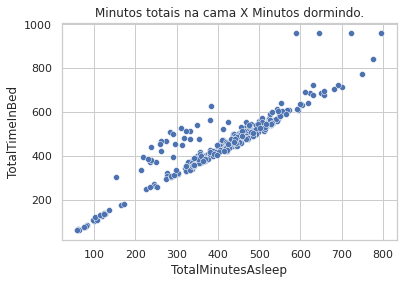

In [502]:
#Gráfico de dispersão de tempo na cama e tempo dormido
d =sns.scatterplot(x='TotalMinutesAsleep', y='TotalTimeInBed', data = sleep_day)
d.set_title('Minutos totais na cama X Minutos dormindo.')
plt.plot()

[]

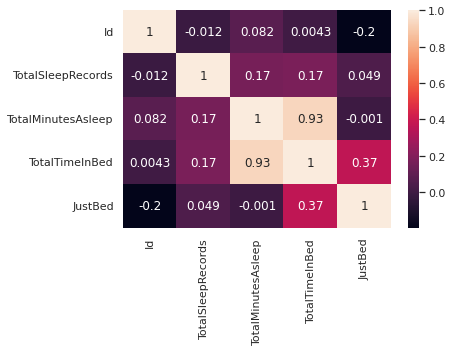

In [503]:
#Matriz de correlação 
sns.heatmap(sleep_day.corr(), annot=True)
plt.plot()

Existe uma correlação de 0.93 entre o tempo em que os usuários passam na cama e o tempo que eles estão adormecidos, o que faz muito sentido. Porem existem alguns pontos no gráfico de dispersão que indicam usuários passando um bom tempo na acordados na cama , seria interessante saber as causas desse fenômeno.

### Quais são os horários de maior intensidade de exercicios, existe uma rotina?

In [504]:
hour_intensities.head()

,data,dia_semana,hora,TotalIntensity,AverageIntensity
0,4/12/2016,Tuesday,00:00:00,20,0.333333
1,4/12/2016,Tuesday,01:00:00,8,0.133333
2,4/12/2016,Tuesday,02:00:00,7,0.116667
3,4/12/2016,Tuesday,03:00:00,0,0.000000
4,4/12/2016,Tuesday,04:00:00,0,0.000000


In [505]:
#Agrupamento da media total de intensidade por hora.
grp_hour_intensities= hour_intensities.groupby(['hora']).mean()
grp_hour_intensities.head()

,TotalIntensity,AverageIntensity
hora,,
00:00:00,2.129550,0.035493
01:00:00,1.419078,0.023651
02:00:00,1.043944,0.017399
03:00:00,0.443730,0.007396
04:00:00,0.633047,0.010551


[]

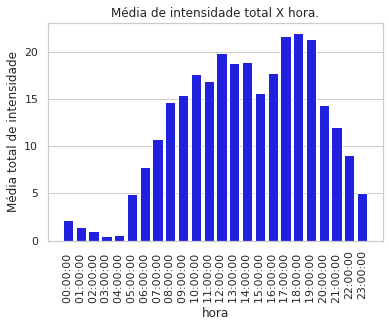

In [506]:
#gráfico de barras
sns.barplot(data=grp_hour_intensities,x=grp_hour_intensities.index, y="TotalIntensity",
            color='blue')
plt.xticks(rotation=90)
plt.title('Média de intensidade total X hora.')

plt.ylabel('Média total de intensidade')

plt.plot()

Existe um pico de intensidade às 5 horas da manhã, possívelmente é nesse horário que os usuários estão acordando. Uma queda às 15 horas, possívelmente quando os usúarios vão almoçar. E uma queda às 20 horas, possívelmente quando eles vão dormir. O período ativo é das 5  às 19, com maior intensidade das 17 horas às 19 horas.  

In [507]:
#Dia da semana agrupada pela média
mon_hour_intensities = hour_intensities[hour_intensities.dia_semana == 'Monday'].groupby(['hora']).mean()
sun_hour_intensities = hour_intensities[hour_intensities.dia_semana == 'Sunday'].groupby(['hora']).mean()
tue_hour_intensities = hour_intensities[hour_intensities.dia_semana == 'Tuesday'].groupby(['hora']).mean()
wed_hour_intensities = hour_intensities[hour_intensities.dia_semana == 'Wednesday'].groupby(['hora']).mean()
thu_hour_intensities = hour_intensities[hour_intensities.dia_semana == 'Thursday'].groupby(['hora']).mean()
fri_hour_intensities = hour_intensities[hour_intensities.dia_semana == 'Friday'].groupby(['hora']).mean()
sar_hour_intensities = hour_intensities[hour_intensities.dia_semana == 'Saturday'].groupby(['hora']).mean()

[]

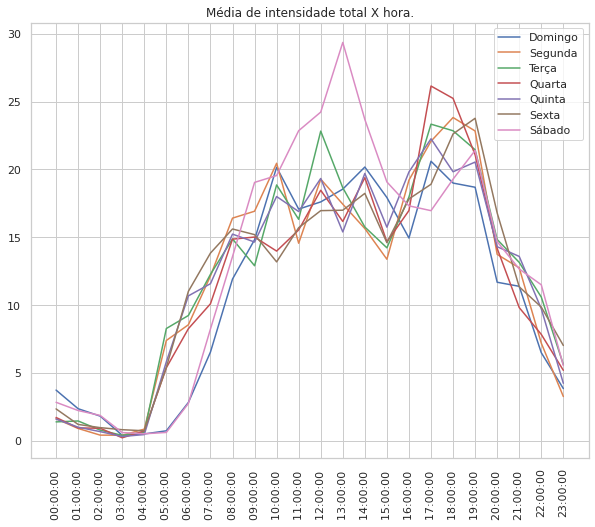

In [508]:
plt.figure(figsize=(10,8))

plt.plot(sun_hour_intensities.index,sun_hour_intensities.TotalIntensity, label='Domingo')
plt.plot(mon_hour_intensities.index,mon_hour_intensities.TotalIntensity,label='Segunda' )
plt.plot(tue_hour_intensities.index,tue_hour_intensities.TotalIntensity,label='Terça')
plt.plot(wed_hour_intensities.index,wed_hour_intensities.TotalIntensity,label='Quarta')
plt.plot(thu_hour_intensities.index,thu_hour_intensities.TotalIntensity,label='Quinta')
plt.plot(fri_hour_intensities.index,fri_hour_intensities.TotalIntensity,label='Sexta')
plt.plot(sar_hour_intensities.index,sar_hour_intensities.TotalIntensity,label='Sábado')

plt.xticks(rotation=90)
plt.title('Média de intensidade total X hora.')

plt.legend()

plt.plot()

Em média a intensidade total é bem parecida para todos os dias da semana, com exeção de sábado que apresenta um pico de intensidade superior aos outros dia da semana, esse pico acontece ao meio dia.

## Tendência no uso do dispositivo.

In [509]:
day_activity.head()

,Id,data,dia_semana,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [510]:
#Agrupamento por dia da semana
grp_d_actv = day_activity.groupby(['dia_semana']).mean()
grp_d_actv.tail()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
dia_semana,,,,,,,,,,,,,,
Saturday,4.908075e+09,8152.975806,5.854677,5.854677,0.000000,1.514597,0.677339,3.617177,0.001048,21.919355,15.201613,207.145161,964.282258,2354.967742
Sunday,4.847640e+09,6933.231405,5.027190,5.027190,0.000000,1.488926,0.618017,2.892314,0.000661,19.983471,14.528926,173.975207,990.256198,2263.000000
Thursday,4.837277e+09,7405.836735,5.312245,5.287415,0.129283,1.390476,0.505170,3.283129,0.002313,19.408163,11.959184,185.421769,961.993197,2199.571429
Tuesday,4.851063e+09,8125.006579,5.832237,5.812829,0.169054,1.613289,0.593026,3.471053,0.001447,22.953947,14.335526,197.342105,1007.361842,2356.013158
Wednesday,4.815191e+09,7559.373333,5.488333,5.467600,0.139588,1.633467,0.527067,3.256333,0.001333,20.780000,13.100000,189.853333,989.480000,2302.620000


[]

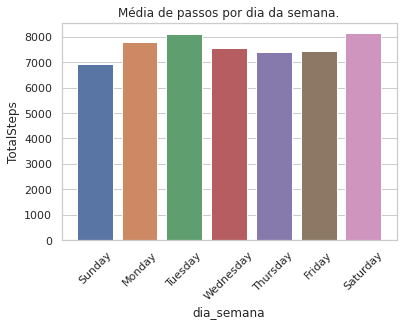

In [511]:
#passos dados por dia da semana
sns.barplot(data=grp_d_actv, x=grp_d_actv.index, y=grp_d_actv.TotalSteps, 
            order=['Sunday','Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'])

plt.xticks(rotation=45)
plt.title("Média de passos por dia da semana.")
plt.plot()

[]

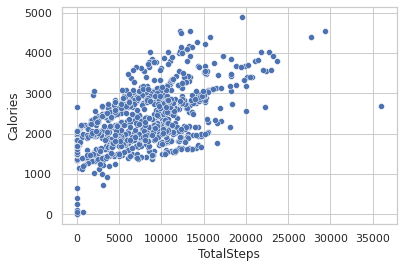

In [512]:
#scatter calorias e passos
sns.scatterplot(data=day_activity, y=day_activity.Calories, x=day_activity.TotalSteps)
plt.plot()

In [513]:
# correlação entre calorias e total de passos
print(day_activity.Calories.corr(day_activity.TotalSteps))

0.5915680862453355


Existe uma correlação moderada em relação ao tempo dormido e o total de passos por dia, o que significa que a quantidade de passos influencia parcialmente na quantidade de sono.

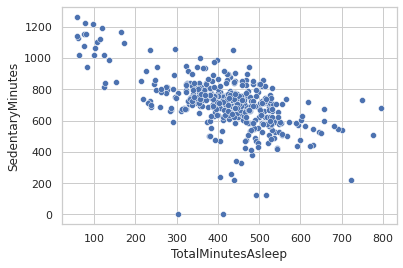

In [517]:
#scatter sono e sedentárismo
sns.scatterplot(data=merge_sleep_activity, x=merge_sleep_activity.TotalMinutesAsleep, y=merge_sleep_activity.SedentaryMinutes)

In [520]:
# correlação entre calorias e total de passos
print(merge_sleep_activity.SedentaryMinutes.corr(merge_sleep_activity.TotalMinutesAsleep))

-0.6010731396971011


Existe uma correlação negativa moderada entre o tempo sedentário no da e quantidade de sono, ou seja o maior tempo sedentário no dia influencia parcialmente numa menor quantidade de tempo adormecido.

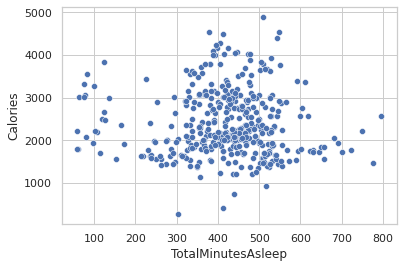

In [518]:
#scatter calorias e sono.
sns.scatterplot(data=merge_sleep_activity, x=merge_sleep_activity.TotalMinutesAsleep, y=merge_sleep_activity.Calories)

In [521]:
# correlação entre calorias e sono
print(merge_sleep_activity.Calories.corr(merge_sleep_activity.TotalMinutesAsleep))

-0.03169899182029161


Não existe correlação entre a quantidade de tempo adormecido e e o gasto calórico.

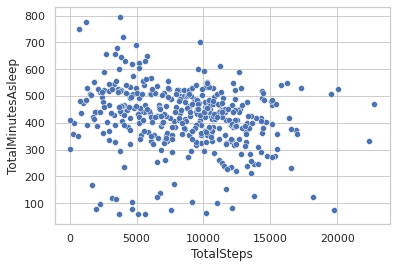

In [519]:
sns.scatterplot(data=merge_sleep_activity, y=merge_sleep_activity.TotalMinutesAsleep, x=merge_sleep_activity.TotalSteps)

In [522]:
# correlação entre calorias e sono
print(merge_sleep_activity.TotalSteps.corr(merge_sleep_activity.TotalMinutesAsleep))

-0.1903439166676316


Não existe correção entre passos dados por dia e minutos de sono dormidos, ou seja, andar mais não vai alterar a quantidade de sono.